In [112]:
import os

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [114]:
%matplotlib inline


In [115]:
df1 = pd.read_csv(r'C:\Users\user\Documents\Python\kifiya\data\benin.csv', nrows=1000)
df2 = pd.read_csv(r'C:\Users\user\Documents\Python\kifiya\data\sierraleone.csv', nrows=1000)
df3 = pd.read_csv(r'C:\Users\user\Documents\Python\kifiya\data\togo.csv', nrows=1000)
# Merge the datasets
df = pd.concat([df1, df2, df3], ignore_index=True)

# Calculate specific measures for each numeric column
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
std_dev_values = df.std(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]
variance_values = df.var(numeric_only=True)

# Print results
print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Standard Deviation:\n", std_dev_values)
print("Mode:\n", mode_values)
print("Variance:\n", variance_values)

Mean:
 GHI              302.702867
DNI              133.985867
DHI              196.212433
ModA             301.423067
ModB             298.234067
Tamb              26.876867
RH                83.668733
WS                 1.565500
WSgust             2.195600
WSstdev            0.438733
WD               177.298800
WDstdev            7.895800
BP               992.083333
Cleaning           0.001333
Precipitation      0.001867
TModA             37.169833
TModB             36.398700
Comments                NaN
dtype: float64
Median:
 GHI              179.05
DNI                1.00
DHI              159.65
ModA             171.50
ModB             168.00
Tamb              26.00
RH                88.80
WS                 1.60
WSgust             2.10
WSstdev            0.50
WD               209.60
WDstdev            7.50
BP               997.00
Cleaning           0.00
Precipitation      0.00
TModA             31.50
TModB             32.10
Comments            NaN
dtype: float64
Standard Deviation

In [116]:
missing_values = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].isnull().sum()
print("Missing Values:\n", missing_values)

# Check for negative values
negative_values = {
    'GHI': df['GHI'] < 0,
    'DNI': df['DNI'] < 0,
    'DHI': df['DHI'] < 0,
    'ModA': df['ModA'] < 0,
    'ModB': df['ModB'] < 0,
    'WS': df['WS'] < 0,
    'WSgust': df['WSgust'] < 0
}

for column, condition in negative_values.items():
    if condition.any():
        print(f"Negative values found in {column}:\n", df[condition])


Missing Values:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Negative values found in GHI:
              Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0     2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1     2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2     2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3     2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4     2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2337  2021-10-25 05:38 -0.8  0.0  0.0   0.4   0.4  25.1  93.8  1.8     2.4   
2338  2021-10-25 05:39 -0.7  0.0  0.0   0.5   0.5  25.1  93.8  1.8     2.1   
2339  2021-10-25 05:40 -0.5  0.0  0.0   0.7   0.7  25.1  93.8  1.7     2.1   
2340  2021-10-25 05:41 -0.4  0.0  0.2   0.8   0.8  25.1  93.4  1.6     2.4 

Outliers in ModA:
 Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []
Outliers in ModB:
 Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []
Outliers in WS:
 Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []
Outliers in WSgust:
             Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
589  2021-08-09 09:50   388.3    4.4  382.6   348.1   350.3  27.8  79.3  5.1   
590  2021-08-09 09:51   433.1   57.4  386.7   393.3   395.5  27.7  78.8  5.1   
591  2021-08-09 09:52   421.8   39.4  387.5   380.3   382.5  27.6  79.8  4.8   
618  2021-08-09 10:19  1104.0  758.8  481.9  1020.0  1025.0  28.9  76.3  4.3   
627  2021-0

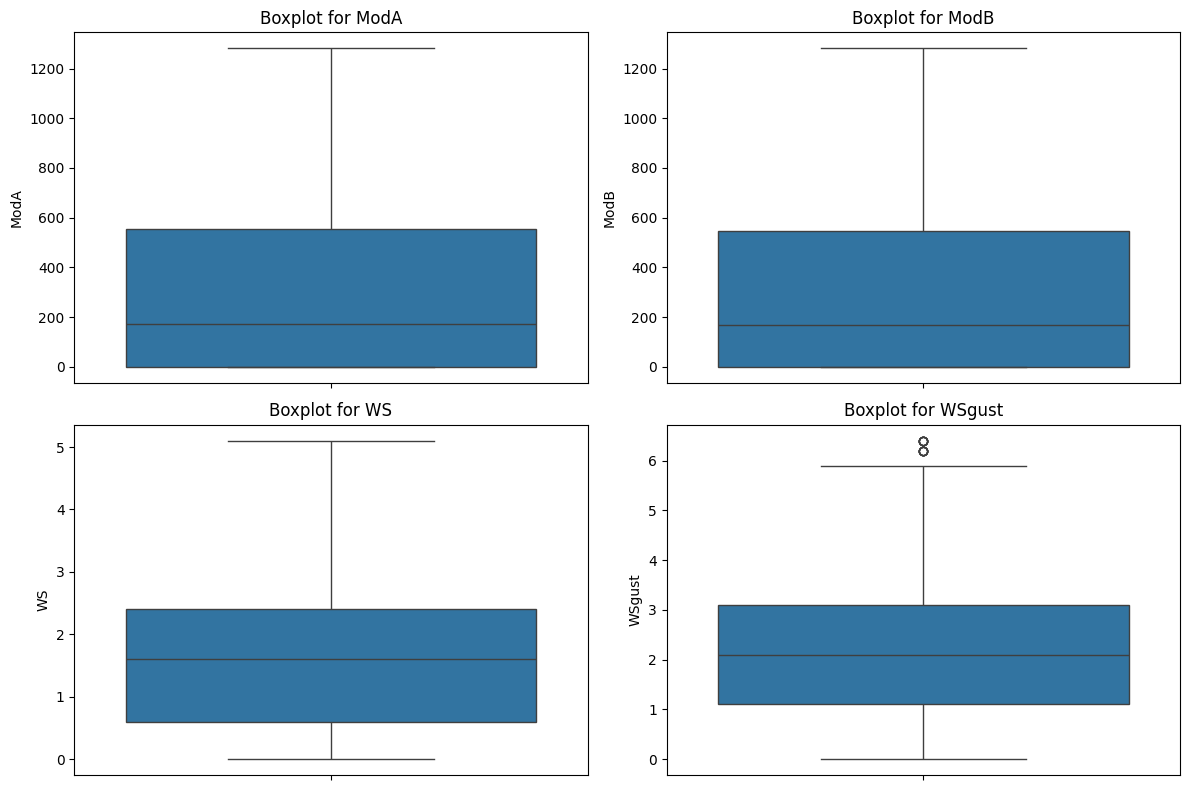

In [117]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in specified columns
outliers_results = {}
for column in ['ModA', 'ModB', 'WS', 'WSgust']:
    outliers_results[column] = detect_outliers_iqr(df, column)
    print(f"Outliers in {column}:\n", outliers_results[column])

plt.figure(figsize=(12, 8))

# Create boxplots for outlier visualization
for i, column in enumerate(['ModA', 'ModB', 'WS', 'WSgust'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [118]:
print("Summary of Findings:")
print("Missing Values:\n", missing_values)
for column, condition in negative_values.items():
    if condition.any():
        print(f"Negative values found in {column}: {df[column][condition].count()} entries")
for column, outliers in outliers_results.items():
    if not outliers.empty:
        print(f"Outliers found in {column}: {outliers.shape[0]} entries")

Summary of Findings:
Missing Values:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Negative values found in GHI: 1128 entries
Negative values found in DNI: 841 entries
Negative values found in DHI: 787 entries
Outliers found in WSgust: 12 entries


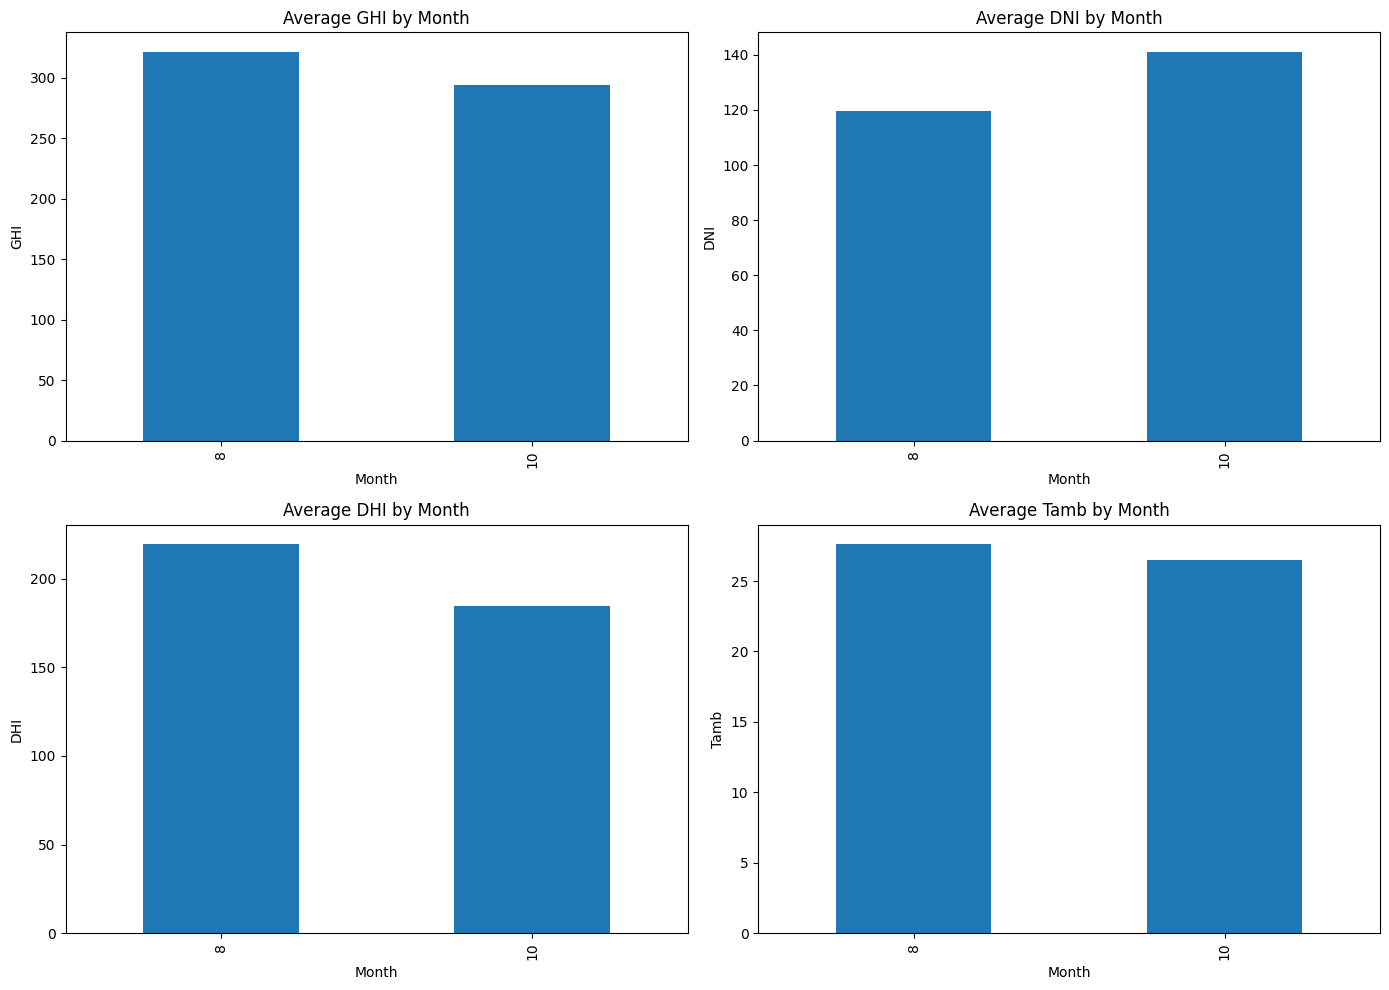

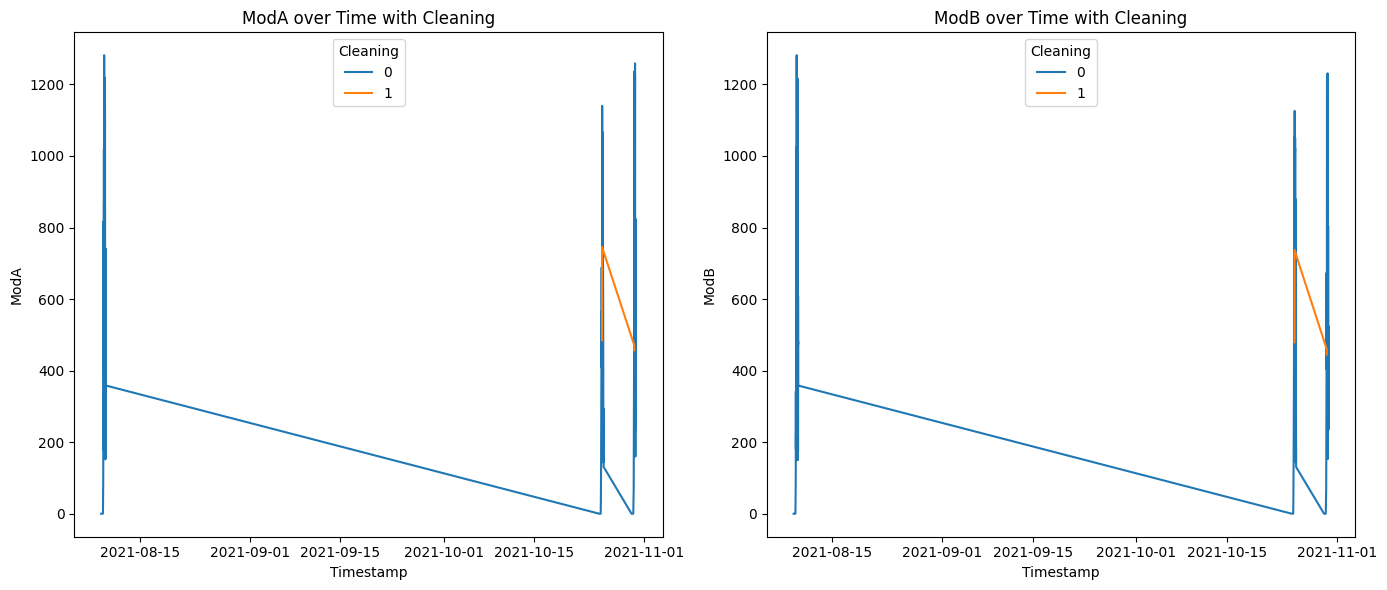

In [119]:
# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract month and hour from the 'Timestamp' column
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
df.groupby('Month')['GHI'].mean().plot(kind='bar')
plt.title('Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('GHI')

plt.subplot(2, 2, 2)
df.groupby('Month')['DNI'].mean().plot(kind='bar')
plt.title('Average DNI by Month')
plt.xlabel('Month')
plt.ylabel('DNI')

plt.subplot(2, 2, 3)
df.groupby('Month')['DHI'].mean().plot(kind='bar')
plt.title('Average DHI by Month')
plt.xlabel('Month')
plt.ylabel('DHI')

plt.subplot(2, 2, 4)
df.groupby('Month')['Tamb'].mean().plot(kind='bar')
plt.title('Average Tamb by Month')
plt.xlabel('Month')
plt.ylabel('Tamb')

plt.tight_layout()
plt.show()

# Evaluate the impact of cleaning on sensor readings (ModA, ModB) over time
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='Timestamp', y='ModA', hue='Cleaning')
plt.title('ModA over Time with Cleaning')
plt.xlabel('Timestamp')
plt.ylabel('ModA')

plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='Timestamp', y='ModB', hue='Cleaning')
plt.title('ModB over Time with Cleaning')
plt.xlabel('Timestamp')
plt.ylabel('ModB')

plt.tight_layout()
plt.show()

Correlation Matrix for Solar Radiation Components and Temperature Measures:
             GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.819398  0.851518  0.955575  0.950894
DNI    0.819398  1.000000  0.414253  0.742323  0.755003
DHI    0.851518  0.414253  1.000000  0.858866  0.849602
TModA  0.955575  0.742323  0.858866  1.000000  0.976112
TModB  0.950894  0.755003  0.849602  0.976112  1.000000


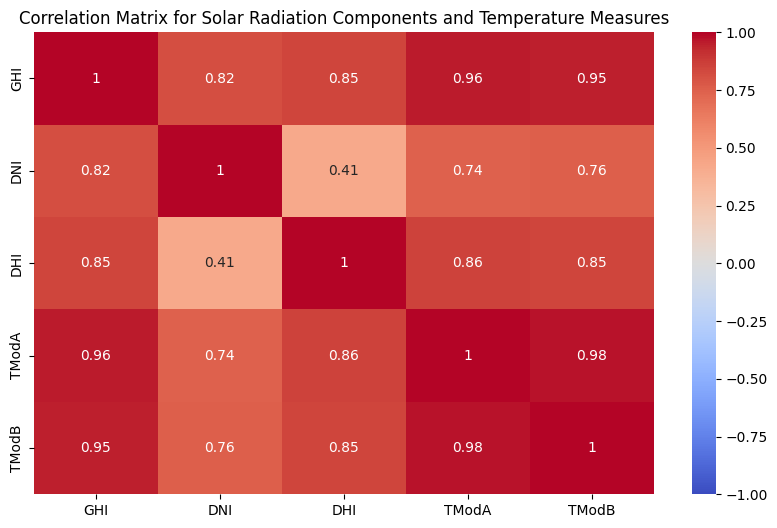

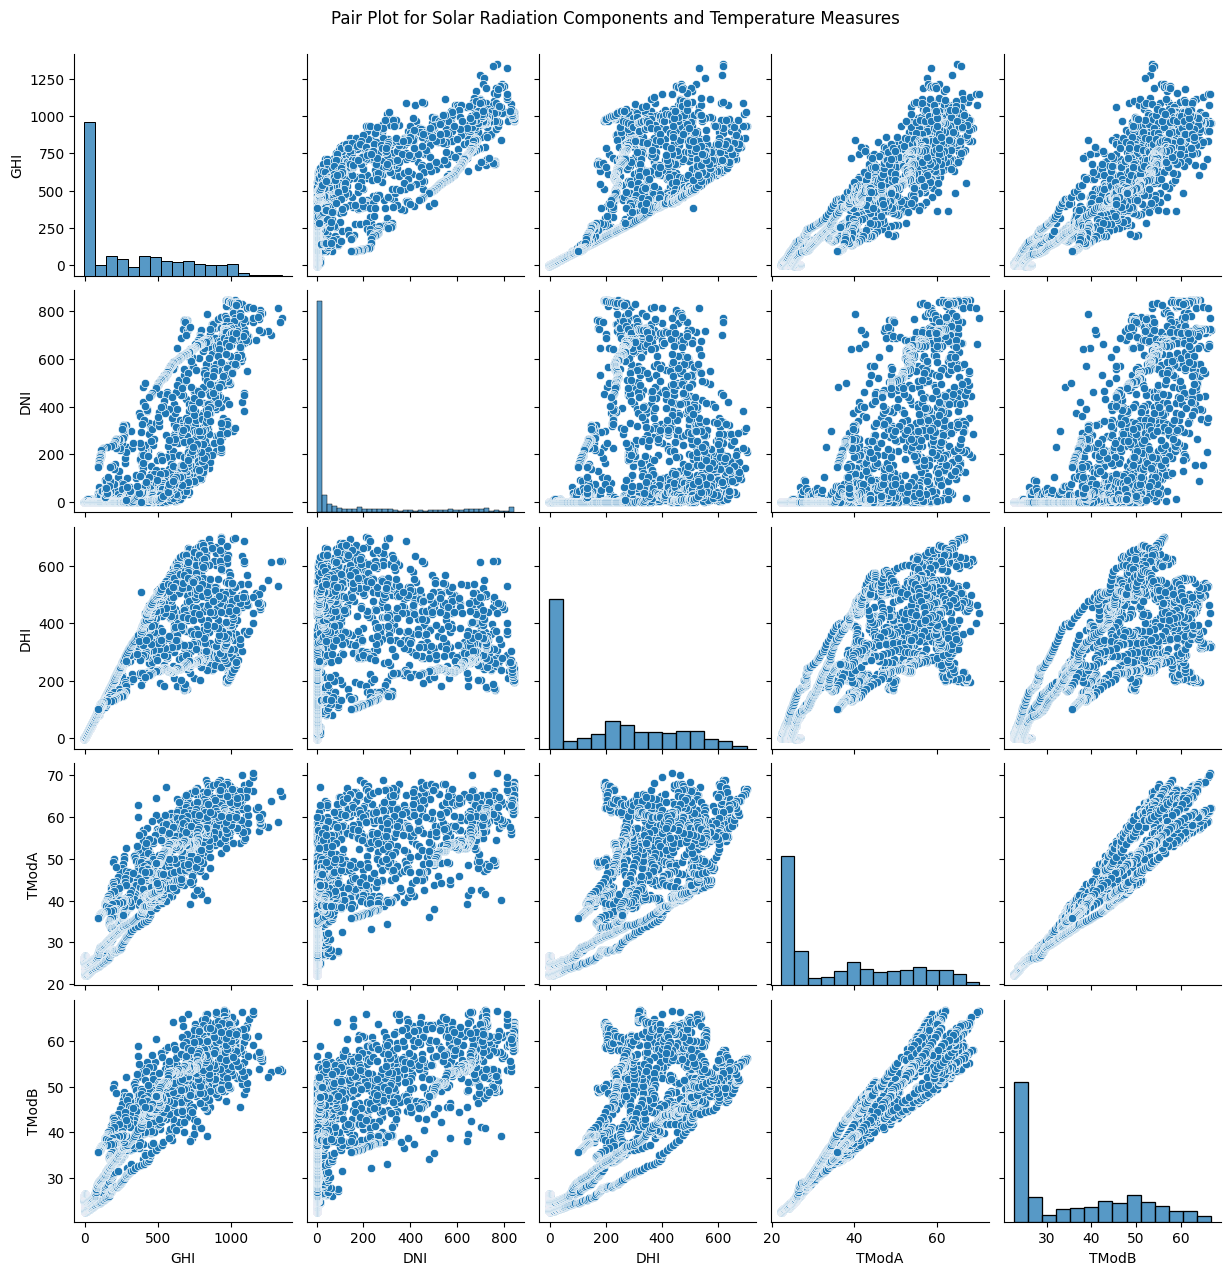

Correlation Matrix for Wind Conditions and Solar Irradiance:
               WS    WSgust        WD       GHI       DNI       DHI
WS      1.000000  0.971729  0.534719  0.466768  0.228594  0.557302
WSgust  0.971729  1.000000  0.566294  0.503845  0.267828  0.580374
WD      0.534719  0.566294  1.000000  0.327121  0.293682  0.287643
GHI     0.466768  0.503845  0.327121  1.000000  0.819398  0.851518
DNI     0.228594  0.267828  0.293682  0.819398  1.000000  0.414253
DHI     0.557302  0.580374  0.287643  0.851518  0.414253  1.000000


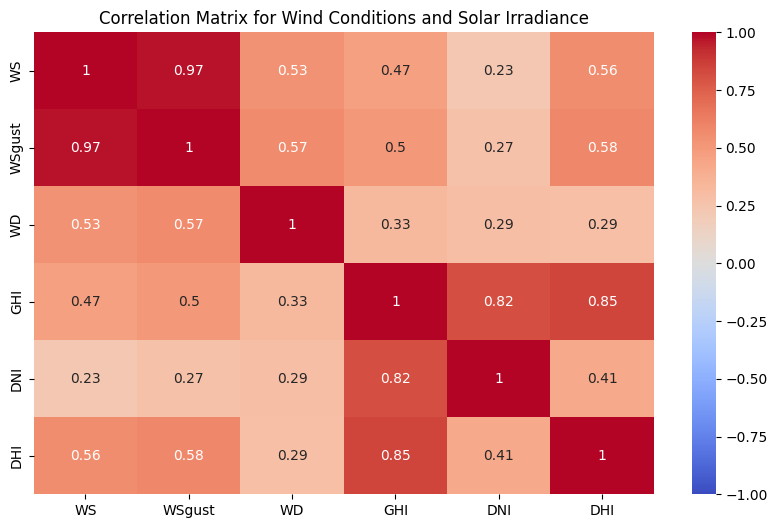

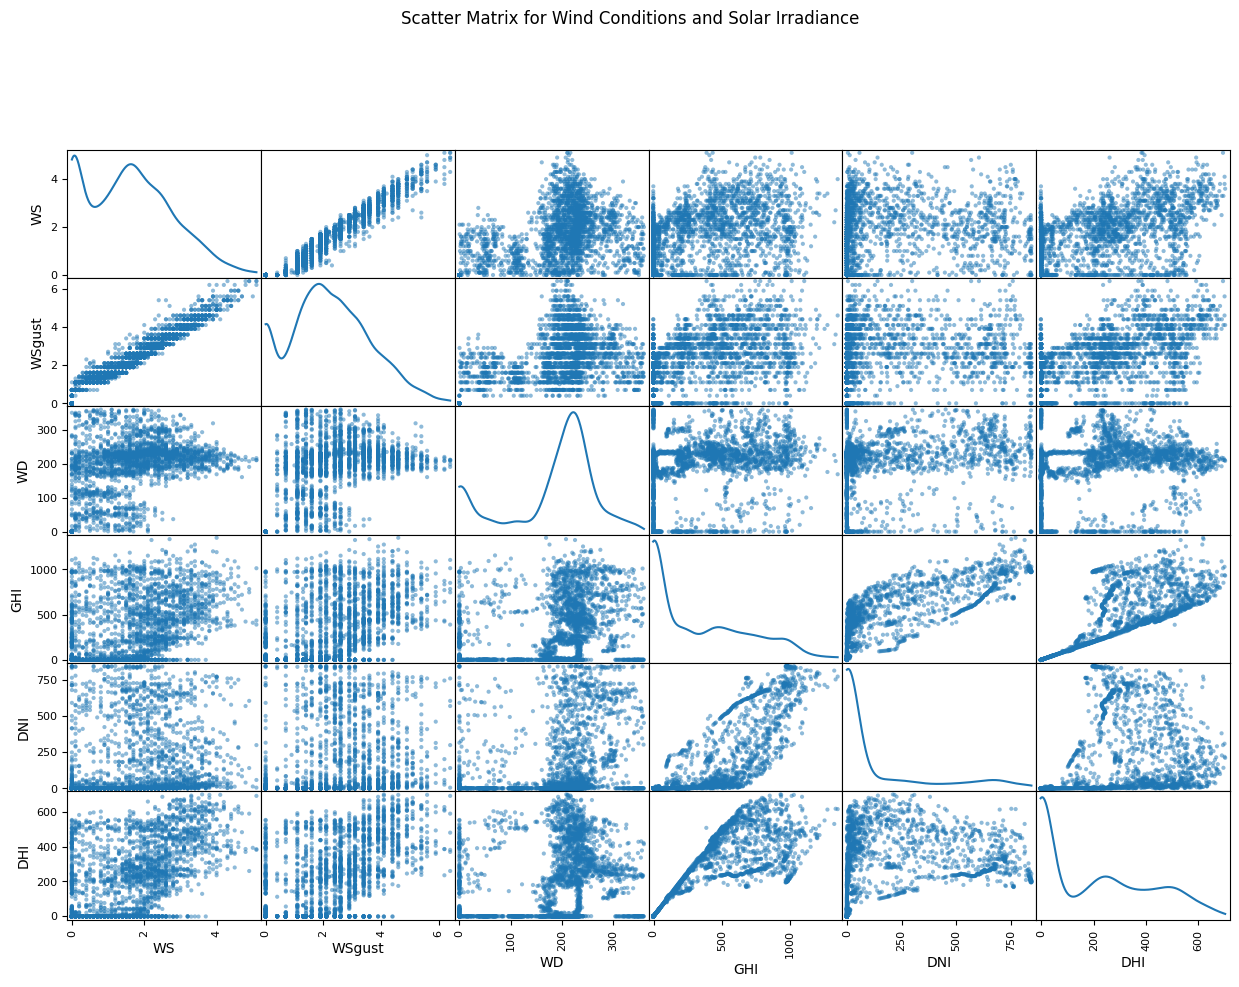

In [120]:
# Check if the required columns exist in the dataframe
required_columns_1 = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
required_columns_2 = ['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']

missing_columns_1 = [col for col in required_columns_1 if col not in df.columns]
missing_columns_2 = [col for col in required_columns_2 if col not in df.columns]

if not missing_columns_1:
	# Calculate the correlation matrix for solar radiation components and temperature measures
	solar_temp_corr = df[required_columns_1].corr()
	print("Correlation Matrix for Solar Radiation Components and Temperature Measures:\n", solar_temp_corr)

	# Plot the correlation matrix using a heatmap
	plt.figure(figsize=(10, 6))
	sns.heatmap(solar_temp_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
	plt.title('Correlation Matrix for Solar Radiation Components and Temperature Measures')
	plt.show()

	# Pair plot for solar radiation components and temperature measures
	sns.pairplot(df[required_columns_1])
	plt.suptitle('Pair Plot for Solar Radiation Components and Temperature Measures', y=1.02)
	plt.show()
else:
	print(f"Missing columns for solar radiation components and temperature measures: {missing_columns_1}")

if not missing_columns_2:
	# Calculate the correlation matrix for wind conditions and solar irradiance
	wind_solar_corr = df[required_columns_2].corr()
	print("Correlation Matrix for Wind Conditions and Solar Irradiance:\n", wind_solar_corr)

	# Plot the correlation matrix using a heatmap
	plt.figure(figsize=(10, 6))
	sns.heatmap(wind_solar_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
	plt.title('Correlation Matrix for Wind Conditions and Solar Irradiance')
	plt.show()

	# Scatter matrix for wind conditions and solar irradiance
	pd.plotting.scatter_matrix(df[required_columns_2], figsize=(15, 10), diagonal='kde')
	plt.suptitle('Scatter Matrix for Wind Conditions and Solar Irradiance', y=1.02)
	plt.show()
else:
	print(f"Missing columns for sWind Conditions and Solar Irradiance: {missing_columns_2}")